## Dependency

In [1]:
import sys
sys.path.append('..')
import os
import tensorflow as tf
from transformers import AutoModelForTokenClassification, AutoTokenizer
from nltk.stem import WordNetLemmatizer
from omegaconf import DictConfig
import hydra
from hydra.core.global_hydra import GlobalHydra
from sklearn.pipeline import Pipeline
from src.scripts.ImageProcessor import ImageProcessor
from src.scripts.TextProcessor import TextProcessor
from src.scripts.UnifyingProcessor import UnifyingProcessor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

d:\DS-intern-task\Task-2\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load conifg

In [2]:
# Clear existing Hydra instance
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

# Re-initialize
with hydra.initialize(config_path="../config", version_base=None):
    cfg = hydra.compose(config_name="ner-config.yaml", return_hydra_config=True)
    global_cfg = hydra.compose(config_name="config.yaml")

## Paths

In [3]:
root_path = os.path.abspath(os.path.join('..')) 
path_to_model = os.path.join(root_path, "models", cfg.model.ner_model_name)
data_path = os.path.join(root_path, "data", "raw-test")
models_path = os.path.join(root_path, "models")

# form model name, all models start with name model underscope and size of trained model
image_model_name = f"model_{global_cfg.image_size}.h5"
image_model_path = os.path.join(models_path, image_model_name)


# Pipeline

In [4]:
# Load NER model and tokenizer
model_ner = AutoModelForTokenClassification.from_pretrained(path_to_model)
tokenizer_ner = AutoTokenizer.from_pretrained(path_to_model)
lemmatizer = WordNetLemmatizer()

In [5]:

# Load Image classification model
model_image = tf.keras.models.load_model(image_model_path)

In [6]:
# Create the pipeline
pipeline = Pipeline([
    ('text_processor', TextProcessor(model_ner, tokenizer_ner, lemmatizer)),
    ('image_processor', ImageProcessor(model_image, global_cfg.image_size, list(global_cfg.LABELS))),
    ('unifying_processor', UnifyingProcessor())
])

In [7]:
# Text input 
text_input = "Is the horse on the picture" 
image_input = os.path.join(data_path, "horse.jpg") 

In [10]:
img = mpimg.imread(image_input)

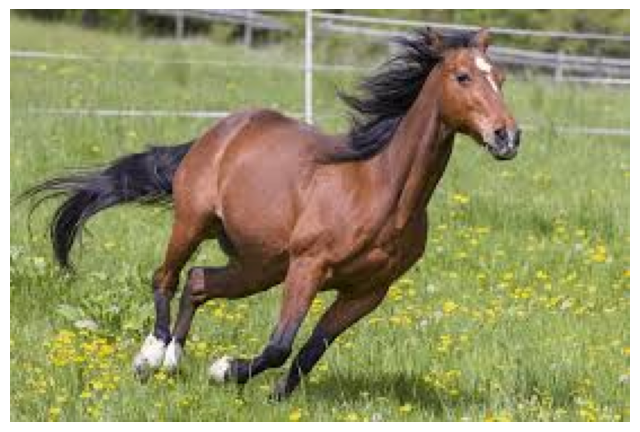

In [ ]:
# visualize the image of a horse
fig, ax = plt.subplots(figsize=(8, 8))  
fig.patch.set_visible(False)  
ax.axis("off") 
ax.imshow(img)

In [13]:
# Apply the pipeline to the input
result = pipeline.transform([text_input, image_input])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


d:\DS-intern-task\Task-2\env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [14]:
print(f"Do the text and image match? {result[0]}") 

Do the text and image match? True
